<a href="https://colab.research.google.com/github/Eng-Abdelrahman-Mostafa-Mohamed/AE/blob/main/VAE_(9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important Libraries


In [ ]:
import os
from PIL import Image

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split

import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
import numpy as np

# Importing Data From Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data_folder = "/content/drive/MyDrive/VAE Data/images"

# Transfrom images (Data Augmentaion)

In [ ]:
# transform = transforms.Compose([
#     transforms.RandomResizedCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(degrees=45),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
#     transforms.ToTensor(),
# ])

# to_pil_image = transforms.ToPILImage()

In [ ]:
# transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.ToTensor(),
# ])

In [ ]:
# dataset = ImageFolder(root=data_folder, transform=transform)

In [ ]:
# save_path_panda = "/content/drive/MyDrive/VAE Data/Data256/Panda/"
# save_path_rabbit = "/content/drive/MyDrive/VAE Data/Data256/Rabbit/"

# os.makedirs(save_path_panda, exist_ok=True)
# os.makedirs(save_path_rabbit, exist_ok=True)

In [ ]:
# for i, (images, label) in enumerate(dataset):
#     class_folder = save_path_panda if label == 0 else save_path_rabbit

#     # Save original image
#     original_image_path = os.path.join(class_folder, f"original_image_{i}.png")
#     save_image(images, original_image_path)

#     # Apply augmentation transformations and save augmented image
#     augmented_image_path = os.path.join(class_folder, f"augmented_image_{i}.png")
#     augmented_image = transform(to_pil_image(images))
#     save_image(augmented_image, augmented_image_path)

# print("Done Augmenting")

# Preparing and Splitting the data

In [ ]:
data_folder = "/content/drive/MyDrive/data"
dataset = ImageFolder(root=data_folder, transform=transforms.ToTensor())

In [ ]:
class_names = dataset.classes
class_names

['Panda', 'Rabbit']

In [ ]:
dataset.class_to_idx

{'Panda': 0, 'Rabbit': 1}

In [ ]:
targets = dataset.targets
torch.tensor(targets)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

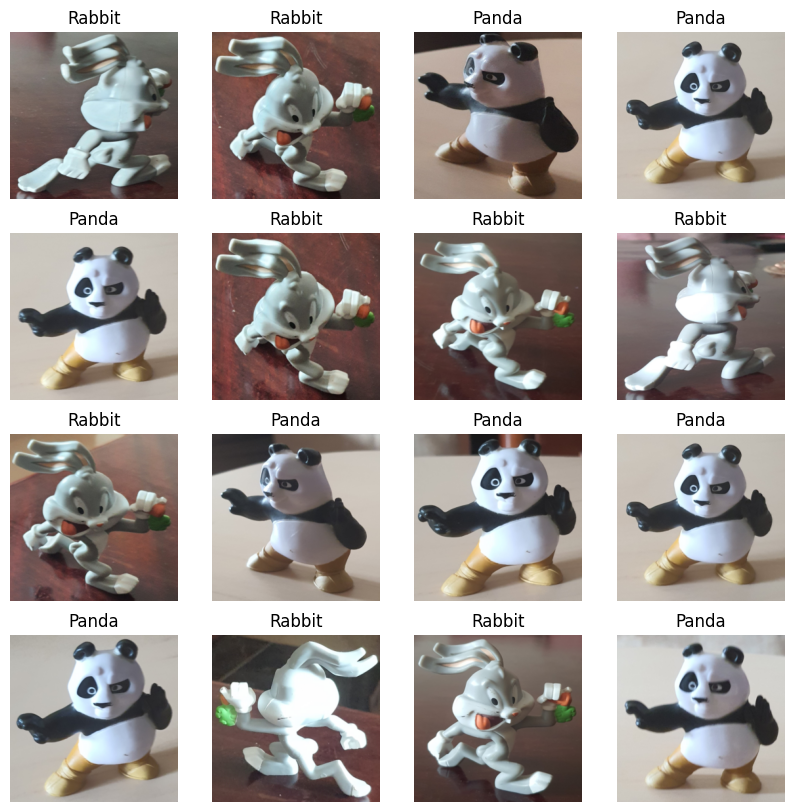

In [ ]:
# Visualizing some images
rows = 4
cols = 4

plt.figure(figsize=(10, 10))
for i in range(1, rows * cols + 1):
    rand_idx = torch.randint(1, len(dataset), size=[1]).item()

    image, label = dataset[rand_idx]
    image = image.permute(1, 2, 0)

    plt.subplot(rows, cols, i)
    plt.axis(False)
    plt.title(class_names[label])
    plt.imshow(image)

In [ ]:
train_ratio = 0.8
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size

In [ ]:
batch_size = 32

In [ ]:
# Like sklearn train test split
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create a DataLoader for training set with shuffling
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create a DataLoader for validation set without shuffling
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 256, 256]), torch.Size([32]))

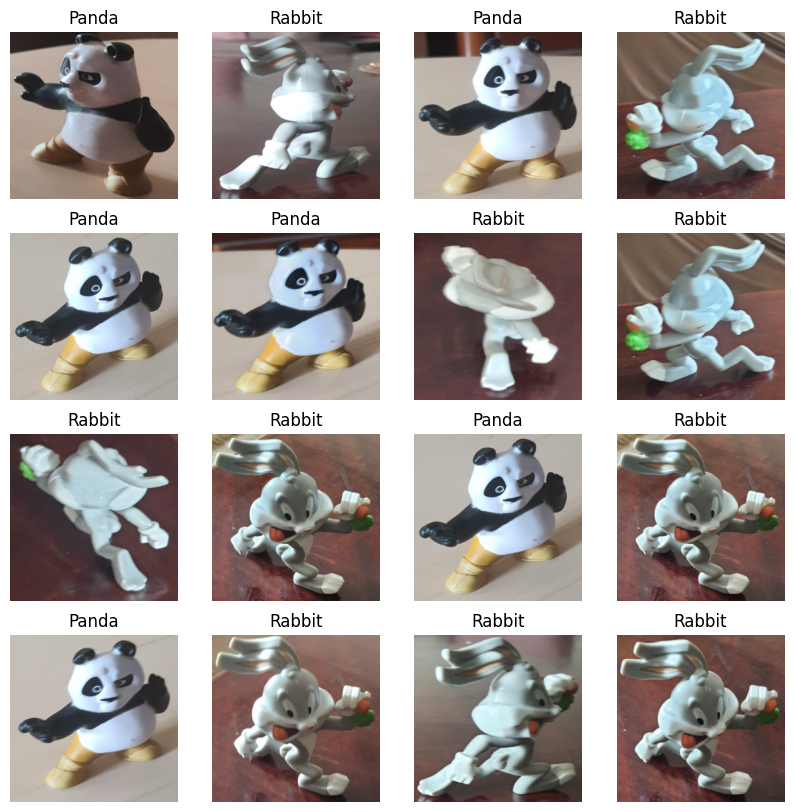

In [ ]:
# Visualizing some images from the batch

rows = 4
cols = 4

plt.figure(figsize=(10, 10))
for i in range(1, rows * cols + 1):

    random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
    img, label = train_features_batch[random_idx].squeeze().permute(1, 2, 0), train_labels_batch[random_idx]

    plt.subplot(rows, cols, i)

    plt.title(class_names[label])
    plt.axis(False)
    plt.imshow(img)

# Variation Auto Encoder

In [ ]:


class VAE(nn.Module):
    def __init__(self, latent_size):
        super(VAE, self).__init__()
        # Encoder
        self.flatten = nn.Flatten(start_dim=1)
        self.input_to_hidden_1 = nn.Linear(3*256*256, 256)
        self.hidden_1_to_hidden2 = nn.Linear(256, 128)
        self.hidden_2_to_hidden3 = nn.Linear(128, 64)
        self.hidden_3_to_MU = nn.Linear(64, latent_size)
        self.hidden_3_to_Sigma = nn.Linear(64, latent_size)

        # Decoder
        self.dec1 = nn.Linear(latent_size, 64)
        self.dec2 = nn.Linear(64, 128)
        self.dec3 = nn.Linear(128, 256)
        self.decod4 = nn.Linear(256, 3*256*256)

    def encode(self, x):
        x = F.relu(self.input_to_hidden_1(x))
        x = F.relu(self.hidden_1_to_hidden2(x))
        x = F.relu(self.hidden_2_to_hidden3(x))
        mu, sigma = self.hidden_3_to_MU(x), self.hidden_3_to_Sigma(x)
        return mu, sigma

    def reparameterize(self, mu, sigma):
        eps = torch.randn_like(sigma)
        return mu + eps * sigma

    def decode(self, z):
        z = F.relu(self.dec1(z))
        z = F.relu(self.dec2(z))
        z = F.relu(self.dec3(z))
        return torch.sigmoid(self.decod4(z))

    def forward(self, x):
        x = self.flatten(x)
        mu, sigma = self.encode(x)
        z = self.reparameterize(mu, sigma)
        return self.decode(z), mu, sigma

# Instantiate the CNN-based VAE model
latent_size = 20
vae = VAE(latent_size)


In [ ]:
# Instantiate the CNN-based VAE model
latent_size = 10
vae = VAE(latent_size)

In [ ]:
def loss_function(recon_x, x, mu, sigma):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + torch.log(pow(sigma,2)) - mu.pow(2) - pow(sigma,2))
    return MSE + KLD

In [ ]:
optimizer = torch.optim.Adam(vae.parameters(), lr=0.1)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
vae.to(device)

VAE(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (input_to_hidden_1): Linear(in_features=196608, out_features=256, bias=True)
  (hidden_1_to_hidden2): Linear(in_features=256, out_features=128, bias=True)
  (hidden_2_to_hidden3): Linear(in_features=128, out_features=64, bias=True)
  (hidden_3_to_MU): Linear(in_features=64, out_features=10, bias=True)
  (hidden_3_to_Sigma): Linear(in_features=64, out_features=10, bias=True)
  (dec1): Linear(in_features=10, out_features=64, bias=True)
  (dec2): Linear(in_features=64, out_features=128, bias=True)
  (dec3): Linear(in_features=128, out_features=256, bias=True)
  (decod4): Linear(in_features=256, out_features=196608, bias=True)
)

In [ ]:
flatten = nn.Flatten(start_dim=1)


In [ ]:

# Assuming you have defined your VAE and DataLoader
vae = VAE(latent_size).to(device)
optimizer = torch.optim.Adam(vae.parameters(), lr=0.001)

epochs = 86

torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(epochs):
    vae.train()

    total_loss = 0.0
    for batch_idx, (data, _) in enumerate(train_dataloader):
        data = data.to(device)

        # Forward Pass
        recon_batch, mu, sigma = vae(flatten(data))

        # Loss
        loss = loss_function(recon_batch, flatten(data), mu, sigma)
        total_loss += loss.item()

        # Optimizer Zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step step step
        optimizer.step()

    average_loss = total_loss / len(train_dataloader.dataset)
    print(f"Epoch {epoch + 1}/{epochs}, Average Loss: {average_loss}")


Epoch 1/86, Average Loss: 11108.90349264706
Epoch 2/86, Average Loss: 10619.599647671568
Epoch 3/86, Average Loss: 9835.418198529413
Epoch 4/86, Average Loss: 9240.931946997549
Epoch 5/86, Average Loss: 7939.388633578431
Epoch 6/86, Average Loss: 8660.654181985294
Epoch 7/86, Average Loss: 8155.501263786765
Epoch 8/86, Average Loss: 7401.6326593137255
Epoch 9/86, Average Loss: 7082.1303615196075
Epoch 10/86, Average Loss: 6791.944278492647
Epoch 11/86, Average Loss: 6488.226600796569
Epoch 12/86, Average Loss: 6219.459367340686
Epoch 13/86, Average Loss: 5906.408088235294
Epoch 14/86, Average Loss: 5566.794941023284
Epoch 15/86, Average Loss: 5485.119944852941
Epoch 16/86, Average Loss: 5330.631318933823
Epoch 17/86, Average Loss: 5188.87069163603
Epoch 18/86, Average Loss: 5091.3807061887255
Epoch 19/86, Average Loss: 5059.087909773284
Epoch 20/86, Average Loss: 4904.898763020833
Epoch 21/86, Average Loss: 4868.699640012255
Epoch 22/86, Average Loss: 4681.819393382353
Epoch 23/86, Ave

# **Testing and plotting**

In [ ]:
recon_batch.shape

torch.Size([24, 196608])

(-0.5, 255.5, 255.5, -0.5)

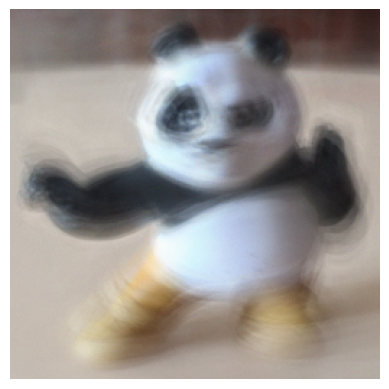

In [ ]:
batch_data, _ = next(iter(test_dataloader))
batch_data = batch_data.to(device)
recon_batch, _, _ = vae(flatten(batch_data))
recon_batch=recon_batch.view(-1,3,256,256)
plt.imshow(recon_batch[11].permute(1,2,0).cpu().detach().numpy())
plt.axis(False)

shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch 

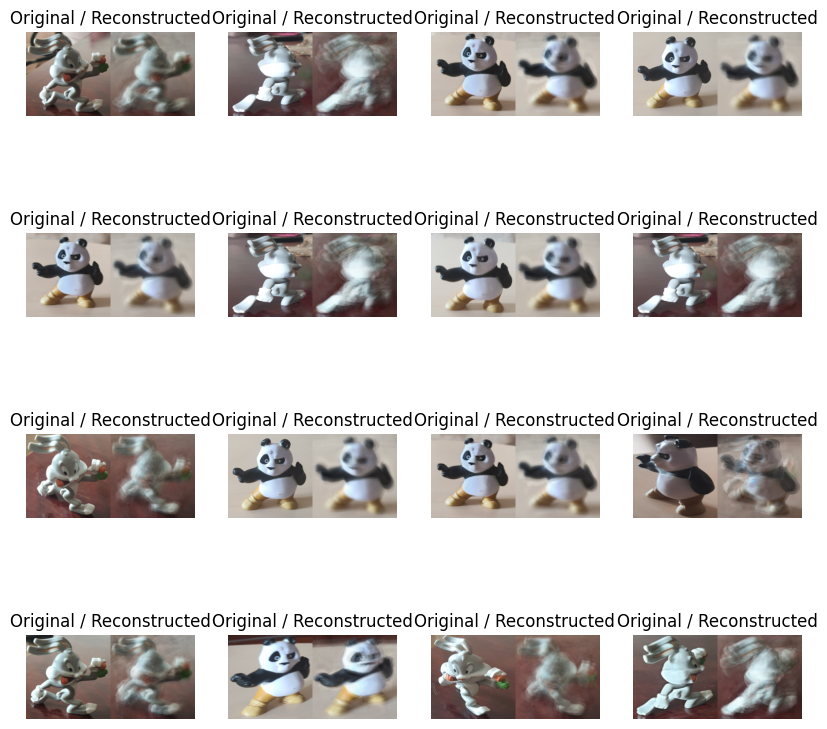

In [ ]:
# Visualizing some images from the test dataloader

rows = 4
cols = 4

plt.figure(figsize=(10, 10))
vae.eval()  # Set the model to evaluation mode

with torch.no_grad():  # Ensure no gradient calculations during inference
    for i in range(1, rows * cols + 1):
        # Retrieve a batch from the test dataloader
        batch_data, _ = next(iter(test_dataloader))
        batch_data = batch_data.to(device)

        # Forward pass to get the reconstructed batch
        recon_batch, _, _ = vae(flatten(batch_data))

        # Select a random index within the batch for visualization
        random_idx = torch.randint(0, batch_data.size(0), size=[1]).item()
        original_img = batch_data[random_idx].squeeze()
        print(f'shape of original_img batch : {original_img.shape}')
        reconstructed_img = recon_batch[random_idx].squeeze()
        print(f'shape of reconstructed batch : {reconstructed_img.shape}')

        # Plot the original and reconstructed images
        plt.subplot(rows, cols, i)
        plt.title("Original / Reconstructed")
        plt.axis(False)
        plt.imshow(torch.cat([original_img.permute(1,2,0), reconstructed_img.reshape(3,256,256).permute(1,2,0)], dim=1).cpu())

plt.show()

In [ ]:
def plot_latent_space_with_labels(z, labels, num_classes):
    # Create a new figure
    fig = plt.figure(figsize=(10, 10))

    # Add a 3D subplot
    ax = fig.add_subplot(111, projection='3d')

    # Create a scatter plot with a different color for each class
    for i in range(num_classes):
        if z.shape[1] == 2:  # Check if the latent space is two-dimensional
            ax.scatter(z[labels == i, 0], z[labels == i, 1], label=("Panda" if i == 0 else "Rabbit"))
        else:
            ax.scatter(z[labels == i, 0], z[labels == i, 1], z[labels == i, 2], label=("Panda" if i == 0 else "Rabbit"))

    ax.set_xlabel('Latent Dimension 1')
    ax.set_ylabel('Latent Dimension 2')
    ax.set_zlabel('Latent Dimension 3')

    plt.legend()
    plt.show()


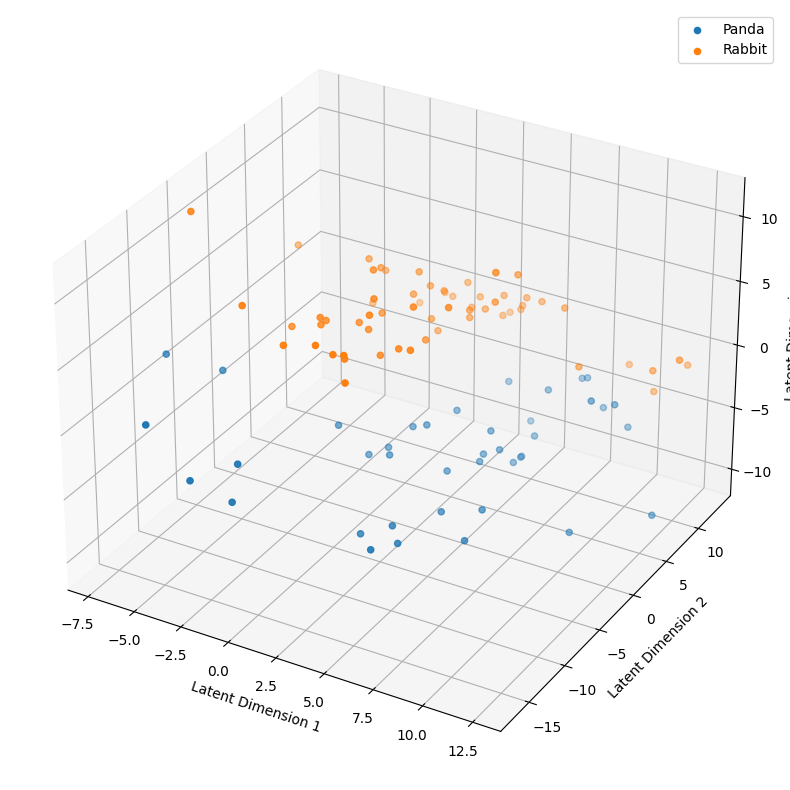

In [ ]:
vae.eval()

# Lists to store latent vectors and labels
latent_vectors = []
labels_list = []
reconstructed_images = []

# Iterate through the test dataset (assuming it's a DataLoader)
with torch.no_grad():
    for batch in test_dataloader:
        images, labels = batch  # Assuming your test dataset provides images and labels

        # Transfer to device
        images = images.to(device)

        # Perform inference
        mu, sigma = vae.encode(flatten(images))
        z = vae.reparameterize(mu, sigma)
        reconstructed_images.append(vae.decode(z))

        # Append latent vectors and labels to lists
        latent_vectors.append(z.cpu().numpy())
        labels_list.append(labels.cpu().numpy())

# Concatenate lists to get NumPy arrays
latent_vectors = np.concatenate(latent_vectors, axis=0)
labels_list = np.concatenate(labels_list, axis=0)

# Assuming you have a function 'plot_latent_space_with_labels' that works with NumPy arrays
plot_latent_space_with_labels(latent_vectors, labels_list, 2)

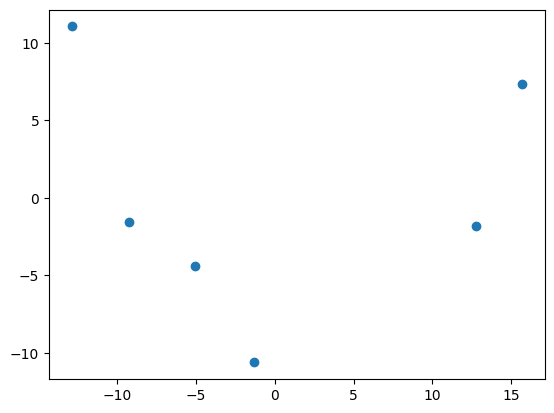

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit the PCA model to your data and apply the dimensionality reduction.
reduced = pca.fit_transform(z.to('cpu'))
plt.scatter(reduced[:,0],reduced[:,1])

# CNN Variation Auto Encoder

In [ ]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [ ]:
class UnFlatten(nn.Module):
    def forward(self, input, size=1024):
        return input.view(input.size(0), size, 1, 1)

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the VAE architecture
class CNNVAE(nn.Module):
    def __init__(self, image_channels=3, latent_size=20):
        super(CNNVAE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(image_channels, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )

        self.fc_mu = nn.Linear(128 * (256 // 8) * (256 // 8), latent_size)
        self.fc_logvar = nn.Linear(128 * (256 // 8) * (256 // 8), latent_size)

        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 128 * (256 // 8) * (256 // 8)),
            nn.Unflatten(1, (128, 256 // 8, 256 // 8)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, image_channels, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        return x_recon, mu, logvar

# Instantiate the VAE model
vae = VAE(20).to(device)

# Define the optimizer
vae_optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Loss function
def loss_fn(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training loop
epochs = 50



In [105]:
image_channels = 3
cnn_vae = CNNVAE(image_channels=image_channels).to(device)
cnn_optimizer = torch.optim.Adam(cnn_vae.parameters(), lr=1e-3)
epochs__ = 50

def loss_fn(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD, BCE, KLD

for epoch in range(epochs__):
    cnn_vae.train()

    for idx, (images, _) in enumerate(train_dataloader):
        images = images.to(device)
        cnn_recon_images, cnn_mu, cnn_logvar = cnn_vae(images)
        cnn_loss, cnn_bce, cnn_kld = loss_fn(cnn_recon_images, images, cnn_mu, cnn_logvar)
        cnn_optimizer.zero_grad()
        cnn_loss.backward()
        cnn_optimizer.step()

    print(f"Epoch[{epoch+1}/{epochs__}] Loss: {cnn_loss.item()} {cnn_bce.item()} {cnn_kld.item()}")


Epoch[1/50] Loss: 3274559.0 3274555.75 3.1508126258850098
Epoch[2/50] Loss: 3206130.25 3206128.25 2.0094635486602783
Epoch[3/50] Loss: 3044764.5 3044760.25 4.144053936004639
Epoch[4/50] Loss: 2937029.75 2937025.0 4.669824600219727
Epoch[5/50] Loss: 2971504.5 2971500.25 4.364080905914307
Epoch[6/50] Loss: 2864101.25 2864096.0 5.222795486450195
Epoch[7/50] Loss: 2863350.5 2863344.5 6.009801387786865
Epoch[8/50] Loss: 2876169.25 2876163.0 6.286012649536133
Epoch[9/50] Loss: 2803611.5 2803603.75 7.796915531158447
Epoch[10/50] Loss: 2837124.0 2837116.5 7.461121082305908
Epoch[11/50] Loss: 2814290.5 2814282.0 8.523356437683105
Epoch[12/50] Loss: 2807295.5 2807286.5 8.898406982421875
Epoch[13/50] Loss: 2785962.5 2785953.0 9.533085823059082
Epoch[14/50] Loss: 2832511.75 2832502.0 9.643714904785156
Epoch[15/50] Loss: 2743563.75 2743552.25 11.485753059387207
Epoch[16/50] Loss: 2768515.0 2768503.75 11.269830703735352
Epoch[17/50] Loss: 2756860.75 2756848.75 11.880424499511719
Epoch[18/50] Loss: 2

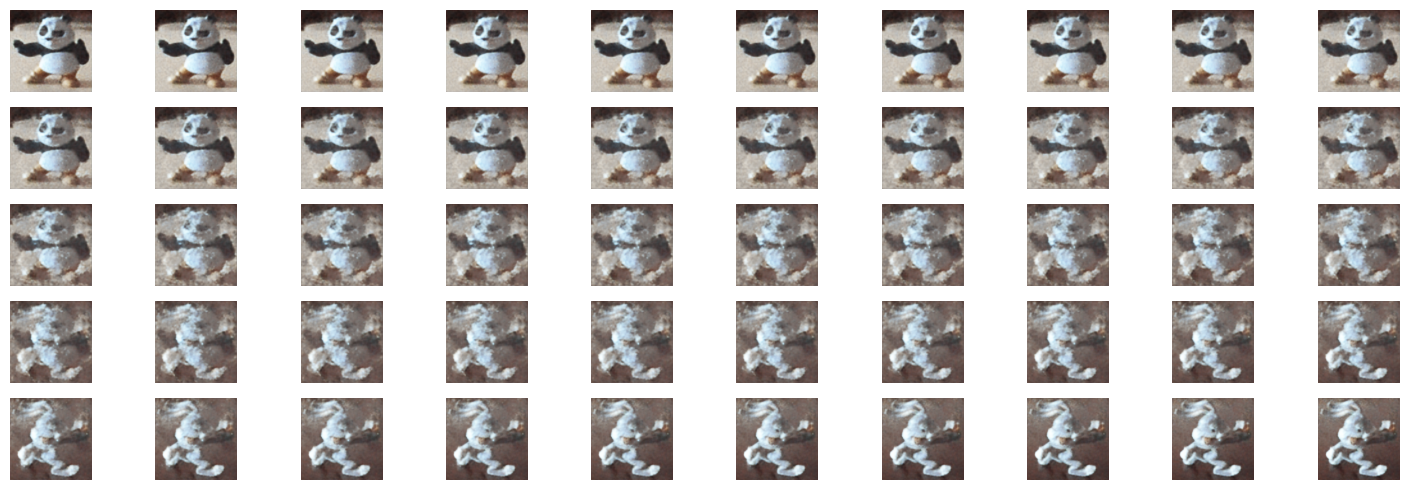

In [147]:


def interpolate_images(vae, image1, image2, steps=50):
    mu1, logvar1 = vae.encode(image1.unsqueeze(0))
    mu2, logvar2 = vae.encode(image2.unsqueeze(0))

    interpolated_images = []
    for step in range(steps):
        alpha = step / steps
        mu = alpha * mu1 + (1 - alpha) * mu2
        logvar = alpha * logvar1 + (1 - alpha) * logvar2
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        interpolated_image = vae.decode(z).cpu().detach()
        interpolated_images.append(interpolated_image.squeeze(0))

    return interpolated_images




# Replace with your specific image indices and desired number of steps:
interpolated_images = interpolate_images(cnn_vae,
                                         # Image 1 from your dataset
                                         train_dataset[0][0].to(device),
                                         # Image 2 from your dataset
                                         train_dataset[210][0].to(device),
                                         )  # 10 interpolation steps

# Example visualization (adjust as needed):
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

for i, image in enumerate(interpolated_images):
    plt.subplot(5,10, i + 1)
    plt.imshow(image.squeeze().permute(1,2,0), cmap="gray")
    plt.axis("off")

plt.tight_layout()
plt.show()

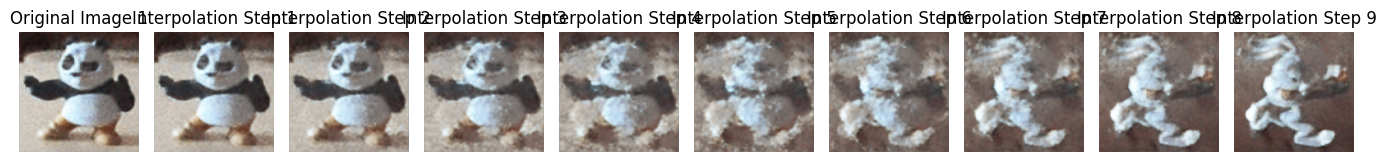

In [133]:
plt.figure(figsize=(15, 5))

for i, image in enumerate(interpolated_images):
    plt.subplot(1, 11, i + 1)
    plt.imshow(image.squeeze().cpu().detach().reshape(3,256,256).permute(1,2,0), cmap="gray")
    if i == 0 or i == 10:
        plt.title(f"Original Image {i + 1}")
    else:
        plt.title(f"Interpolation Step {i}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# Conditional Variation Auto Encoder

In [ ]:
class CVAE(nn.Module):
    def __init__(self, latent_size, num_classes):
        super(CVAE, self).__init__()

        self.num_classes = num_classes
        self.conv1 = nn.Conv2d(3 + num_classes, 32, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.fc1 = nn.Linear(128 * 32 * 32, 256)
        self.fc21 = nn.Linear(256, latent_size)
        self.fc22 = nn.Linear(256, latent_size)

        # Decoder
        self.fc3 = nn.Linear(latent_size + num_classes, 256)
        self.fc4 = nn.Linear(256, 128 * 32 * 32)
        self.deconv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.deconv2 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1)
        self.deconv3 = nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1)

    def encode(self, x, y):
        y = y.view(-1, self.num_classes, 1, 1)
        y = y.expand(-1, self.num_classes, x.size(2), x.size(3))
        x = torch.cat([x, y], dim=1)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        mu, sigma = self.fc21(x), self.fc22(x)
        return mu, sigma

    def reparameterize(self, mu, sigma):
        eps = torch.randn_like(sigma)
        return mu + eps * sigma

    def decode(self, z, y):
        y = y.view(-1, self.num_classes)
        z = torch.cat([z, y], dim=1)  # Concatenate the labels to the latent variables
        z = F.relu(self.fc3(z))
        z = F.relu(self.fc4(z))
        z = z.view(z.size(0), 128, 32, 32)
        z = F.relu(self.deconv1(z))
        z = F.relu(self.deconv2(z))
        return torch.sigmoid(self.deconv3(z))

    def forward(self, x, y):
        mu, sigma = self.encode(x, y)
        z = self.reparameterize(mu, sigma)
        return self.decode(z, y), mu, sigma

In [ ]:
# Instantiate the CNN-based CVAE model
latent_size = 2
num_classes = 2
cvae = CVAE(latent_size, num_classes)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cvae=cvae.to(device)

In [ ]:
# Define the optimizer
optimizer = torch.optim.Adam(cvae.parameters(), lr=0.1)

In [ ]:
# Train the model
for epoch in range(15):
    cvae.train()
    train_loss = 0

    for batch_idx, (data, labels) in enumerate(train_dataloader):
        data = data.to(device)
        labels = F.one_hot(labels, num_classes=num_classes).float().to(device)

        # Forward Pass
        recon_batch, mu, sigma = cvae(data, labels)

        # Loss
        loss = loss_function(recon_batch, data, mu, sigma)
        train_loss += loss.item()

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()
    print('Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(train_dataloader.dataset)))


In [ ]:
next(iter(cvae.parameters())).device

In [ ]:
cvae.to(device)

In [ ]:
cvae.eval()  # Set the model to evaluation mode

all_mu, all_sigma = [], []

with torch.inference_mode():  # Ensure no gradient calculations during inference
    for batch_data, batch_labels in test_dataloader:
        batch_data = batch_data.to(device)
        batch_labels = F.one_hot(batch_labels, num_classes=num_classes).float().to(device)

        mu, sigma = cvae.encode(batch_data, batch_labels)
        all_mu.append(mu)
        all_sigma.append(sigma)

# Concatenate the results from different batches
mu_tensor = torch.cat(all_mu, dim=0)
sigma_tensor = torch.cat(all_sigma, dim=0)

In [ ]:
z_conditional_sam = cvae.reparameterize(mu_tensor, sigma_tensor)

# Assuming you want to condition the generation on class 1
condition_label = torch.tensor([[1.0, 0.0]]).float().to(device)
condition_label = condition_label.expand(z_conditional_sam.size(0), -1)

reconstructed_conditioned = cvae.decode(z_conditional_sam, condition_label)

In [ ]:
plt.imshow(reconstructed_conditioned[0].detach().cpu().numpy().reshape(256,256,3))
plt.axis(False)